# Analysis of velocity based on events
Noteboook for methodology of correlating the calculated angular velocity of a rat to velocity of event extracted from event log.

In [27]:
import numpy as np
import pandas as pd
import h5py
import ast

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

path = '../datasets/analysis/'

fname = [
    'VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC',
    'VRAcuityExp_2017-07-13_15-05-16_VR-2B_NIC',
    'VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU',
    'VRAcuityExp_2017-07-13_15-38-34_VR-1A_NIC',
    'VRAcuityExp_2017-07-13_15-53-40_VR-1B_NIC',
    'VRAcuityExp_2017-07-13_16-11-46_VR-3A_NIC',
    'VRAcuityExp_2017-07-13_16-27-08_VR-3A_NIC',
    'VRAcuityExp_2017-07-13_17-09-07_VR-5A_NIC', ]

event = {}
dfV = {}
dfU = {}
for i, x in enumerate(fname):
    event[i] = pd.read_hdf(path+x+'_event.h5'   , 'Event')      
    dfV[i]   = pd.read_hdf(path+x+'_velocity.h5', 'Full' )      
    dfU[i]   = dfV[i].drop({'X_Ori', 'Y_Ori', 'Z_Ori', 'dTime', 'lx1', 'lz1', 'lx2', 'lz2'}, axis=1)

    

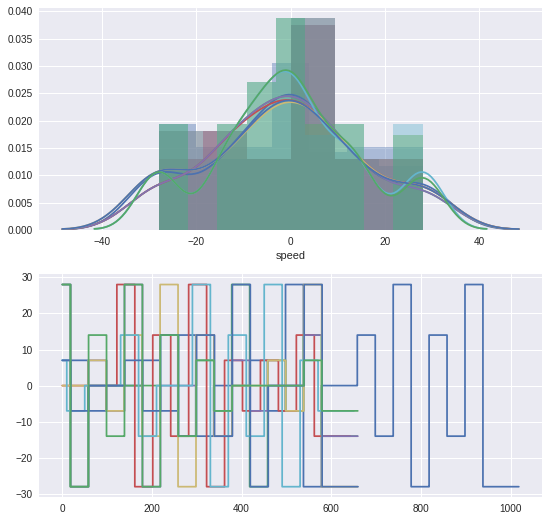

In [3]:
# grid velocity plots for all experiments
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for i in range(0, len(fname)):
    sns.distplot(event[i].speed, ax=ax1)
    ax2.plot    (event[i].Time , event[i].speed)

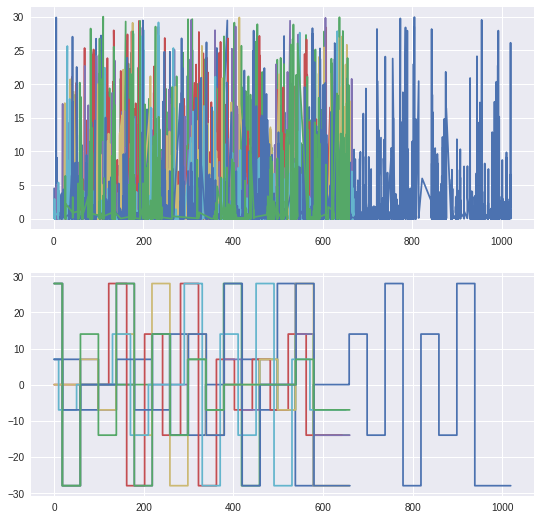

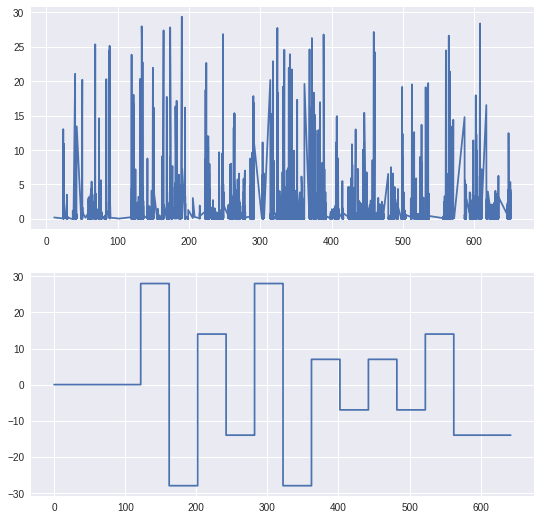

In [24]:
# print of the data to be compared     
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
    
for i, x in enumerate(fname):
    ax1.plot(dfV[i].Time  , dfV[i].U)
    ax2.plot(event[i].Time, event[i].speed)
    
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
    
ax1.plot(dfV[2].Time  , dfV[2].U)
ax2.plot(event[2].Time, event[2].speed)

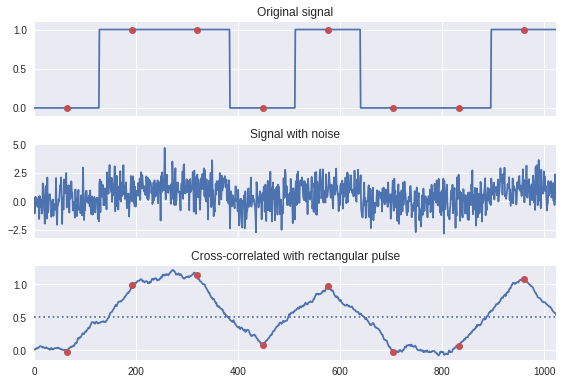

In [52]:
from scipy import signal
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + np.random.randn(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()


Index(['Frame', 'Time_x', 'visible', 'speed', 'U'], dtype='object')


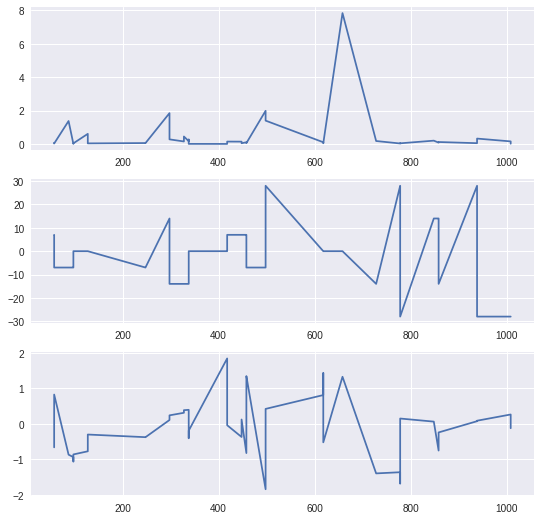

In [71]:
i = 0
df = pd.merge(event[i], dfU[i], on='Frame')
df.drop({'MotiveExpTimeSecs', 'Time_y', 'Vxyz', 'theta'}, axis=1, inplace=True)

print(df.keys())

df.corr = signal.correlate(df.speed, df.U, mode='same') / 128
fig = plt.figure(figsize=(9,9))

#print(df)
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
    
ax1.plot(df.Time_x, df.U)
ax2.plot(df.Time_x, df.speed)
ax3.plot(df.Time_x, df.corr)
